Zdroj dat: databáze Filmový přehled Národního filmového archivu.

In [1]:
import os
import json
import pandas as pd
from src.vycisti import vycisti
pd.set_option('display.max_columns', None)
df = pd.read_json(os.path.join("data", "filmy.json"))
with open(os.path.join("data_fixes", "opravy.json"), encoding="utf-8") as opravy:
    opravy = json.loads(opravy.read())
with open(os.path.join("data_fixes", "seznamy.json"), encoding="utf-8") as seznamy:
    seznamy = json.loads(seznamy.read())
df = vycisti(df, opravy)

2023/06/02 09:25:04 z 4555 řádků odstraněno 133. Aktuální dataframe má 4422 řádků.


In [2]:
persony = pd.read_json(os.path.join("data", "persony.json")).drop_duplicates()

In [3]:
df = df.explode("Lokace")

In [4]:
df["Lokace"] = df["Lokace"].apply(lambda x: x.split(", ") if isinstance(x, str) else x)

In [5]:
df = df.explode("Lokace")

In [6]:
def mesto(lokace):
    
    if isinstance(lokace, str):
    
        if "(" in lokace:

            zavorka = lokace.split("(")[1].replace(")","").strip()

            if zavorka in seznamy["praha"]:

                mesto = "Praha"

            elif zavorka == "Česká republika":
                
                mesto = lokace.split("(")[0].strip()
            
            else:

                mesto = zavorka

        else:
            
            mesto = lokace
            
        if "Česká republika, " in mesto:
                
            mesto = mesto.split(",")[1].strip()
            
    else:

        mesto = lokace         
        
    return(mesto)

In [7]:
df["Město"] = df["Lokace"].apply(lambda x: mesto(x))

## Jak jsou data vyplněná

<AxesSubplot:xlabel='Copyright'>

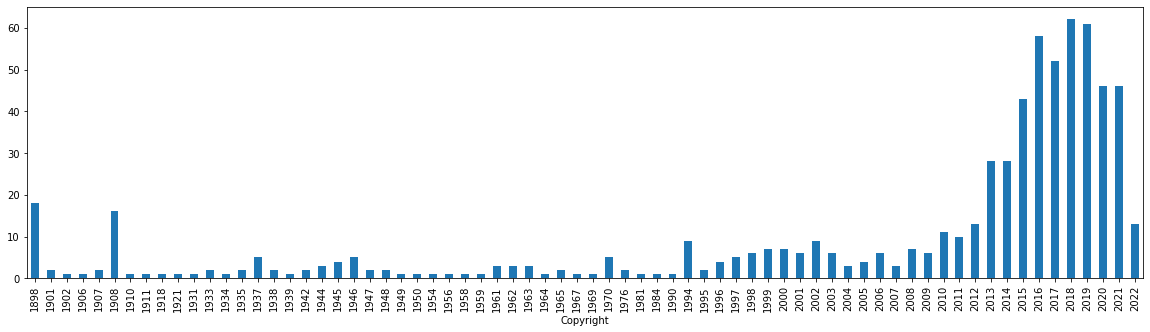

In [8]:
df[~df["Město"].isnull()].groupby("Copyright")["Film"].nunique().plot.bar(figsize=(20,5))

Budeme proto raději kalkulovat hlavně s filmy posledních 10 let.

## Nejčastější lokace

České celovečerní hrané filmy od r. 2013 včetně:

In [9]:
hcf = df[df["Délka"] == "dlouhometrážní"].explode("Typologie")
hcf = hcf[hcf["Typologie"] == "hraný"]
hcf = hcf[hcf["Copyright"] >= 2013]

Pořadí měst podle počtu natáčených filmů:

In [10]:
hcf.groupby("Město")["Film"].nunique().nlargest(60)

Město
Praha                   164
Česká republika          80
Slovensko                47
Brno                     11
Kladno                   11
Jaroměř                  10
Mělník                   10
Bratislava                9
Beroun                    8
Rakousko                  8
Zlín                      8
Hradec Králové            7
Mladá Boleslav            7
Plzeň                     7
Karlovy Vary              6
Liberec                   6
Litoměřice                6
Olomouc                   6
Ostrava                   6
Ústí nad Labem            6
Černošice                 6
Brandýs nad Labem         5
Brdy                      5
Francie                   5
Holašovice                5
Veltrusy                  5
Doksy                     4
Hluboká nad Vltavou       4
Itálie                    4
Kolín                     4
Krkonoše                  4
Králův Dvůr               4
Mikulov                   4
Netolice                  4
Německo                   4
Polsko        

In [11]:
top_mesta = hcf.groupby("Město")["Film"].nunique().nlargest(60)
top_mesta = top_mesta[top_mesta >= 4]
nemesta = ["Praha","Česká republika","Slovensko","Bratislava","Rakousko","Německo","Itálie","Polsko","Norsko","Dunaj"]
top_mesta = [x for x in top_mesta.index.to_list() if x not in nemesta]

Kompletní seznam filmů a lokací ve městech:

In [12]:
for t in top_mesta:
    print(f"{t.upper()}:")
    filmy = hcf[hcf["Město"].str.contains(t, na=False)]["Film"].drop_duplicates().to_list()
    for f in filmy:
        print(f"""{f.upper()} | Lokality: {", ".join(hcf[(hcf["Město"] == t) & (hcf["Film"] == f)]["Lokace"].drop_duplicates().to_list())}""")
    print("***")

BRNO:
ZEJTRA NAPOŘÁD (400555) | Lokality: Brno (Česká republika)
LÍDA BAAROVÁ (400696) | Lokality: Brno (Česká republika), Národní divadlo – Mahenovo divadlo (Brno), Černá Pole (Brno), Pisárky (Brno)
KOMICI S.R.O. THE TOUR (401731) | Lokality: Brno
VŠECHNO BUDE FAJN! (401386) | Lokality: Brno
PEPA (401760) | Lokality: Brno (Česká republika)
ALENKA V ZEMI ZÁZRAKŮ (401746) | Lokality: Brno (Česká republika), hlavní nádraží (Brno), Mendlovo náměstí (Brno), Opatství svatého Tomáše /Starobrněnský klášter/ (Brno), Jakubské náměstí (Brno), kostel sv. Jakuba Staršího (Brno), Petrov (Brno), katedrála sv. Petra a Pavla (Brno), Kraví hora (Brno), hvězdárna a planetárium (Brno), Výstaviště (Brno), Jihlavská ulice (Brno), krematorium (Brno), Ústřední hřbitov (Brno)
NABARVENÉ PTÁČE (401962) | Lokality: Brno (Česká republika), ulice Cejl (Brno)
SKLENĚNÝ POKOJ (401929) | Lokality: Brno (Česká republika), Výstaviště (Brno), Černá Pole (Brno), Vila Tugendhat (Brno), Pisárky (Brno), Vila Stiassni (Brno),

TEORIE TYGRA (400705) | Lokality: Černošice
MANŽEL NA HODINU (401145) | Lokality: Černošice
TEN, KDO TĚ MILOVAL (401842) | Lokality: Černošice
TERORISTKA (401826) | Lokality: Černošice, Ukrajinská ulice (Černošice)
ŽENSKÁ NA VRCHOLU (402005) | Lokality: Černošice (Česká republika)
CHLAP NA STŘÍDAČKU (402037) | Lokality: Černošice
***
BRANDÝS NAD LABEM:
BONY A KLID 2 (400547) | Lokality: Brandýs nad Labem
PŘÁNÍ K MÁNÍ (401732) | Lokality: Brandýs nad Labem
NA KRÁTKO (401757) | Lokality: Brandýs nad Labem (Česká republika), Brázdimská ulice (Brandýs nad Labem), nemocnice (Brandýs nad Labem)
MODELÁŘ (402079) | Lokality: Brandýs nad Labem (Česká republika), okolí (Brandýs nad Labem)
MĚSTO (402235) | Lokality: Brandýs nad Labem, vrakoviště (Brandýs nad Labem)
***
BRDY:
CESTA ZA KRÁLEM TROLLŮ (401723) | Lokality: 
SNĚŽÍ! (401921) | Lokality: Brdy
TOMAN (401772) | Lokality: Brdy (Česká republika)
NABARVENÉ PTÁČE (401962) | Lokality: Brdy (Česká republika), pěchotní srub Jordán (Brdy)
TAJEMSTV

Místa v Praze:

In [13]:
hcf[hcf["Město"] == "Praha"].groupby("Lokace")["Film"].nunique().nlargest(50)

Lokace
Praha                               99
Praha (Česká republika)             57
Nové Město (Praha)                  49
Vltava (Praha)                      39
Vinohrady (Praha)                   27
Žižkov (Praha)                      27
Staré Město (Praha)                 26
Malá Strana (Praha)                 24
Hradčany (Praha)                    23
Holešovice (Praha)                  20
Smíchov (Praha)                     19
Bubeneč (Praha)                     18
Dejvice (Praha)                     18
Nusle (Praha)                       18
Karlín (Praha)                      14
Václavské náměstí (Nové Město)      14
Josefov (Praha)                     11
Podolí (Praha)                      10
Ruzyně (Praha)                      10
Vršovice (Praha)                    10
Bohnice (Praha)                      8
Mánesův most (Vltava)                8
Pernerova ulice (Karlín)             8
Pražský hrad (Hradčany)              8
Vysočany (Praha)                     8
Karlův most (Vltav

## Nejčastější mosty, ulice, náměstí atp.

In [14]:
hcf[hcf["Lokace"].str.lower().str.contains("most", na=False)].groupby("Lokace")["Film"].nunique().nlargest(10)

Lokace
Mánesův most (Vltava)                          8
Karlův most (Vltava)                           7
most Legií (Vltava)                            6
Nuselský most (Praha)                          5
Jiráskův most (Vltava)                         3
most Slovenského národního povstání (Dunaj)    3
železniční most (Praha)                        3
Čechův most (Vltava)                           2
Štefánikův most (Vltava)                       2
železniční most (Vltava)                       2
Name: Film, dtype: int64

In [15]:
hcf[hcf["Lokace"].str.lower().str.contains("náměstí", na=False)].groupby("Lokace")["Film"].nunique().nlargest(10)

Lokace
Václavské náměstí (Nové Město)                 14
náměstí Curieových (Staré Město)                5
náměstí Jana Palacha (Josefov)                  5
náměstí Svobody (Bubeneč)                       5
Loretánské náměstí (Hradčany)                   4
Malostranské náměstí (Malá Strana)              4
Staroměstské náměstí (Staré Město)              4
Hradčanské náměstí (Hradčany)                   3
Lyčkovo náměstí (Karlín)                        3
Skleněný palác /interiér/ (náměstí Svobody)     3
Name: Film, dtype: int64

In [16]:
hcf[hcf["Lokace"].str.lower().str.contains("ulice", na=False)].groupby("Lokace")["Film"].nunique().nlargest(10)

Lokace
Pernerova ulice (Karlín)          8
Koulova ulice (Dejvice)           5
Viničná ulice (Mladá Boleslav)    5
Nádražní ulice (Smíchov)          4
Sokolovská ulice (Karlín)         4
Tusarova ulice (Holešovice)       4
ulice Na Pankráci (Nusle)         4
Bělohorská ulice (Břevnov)        3
Hellichova ulice (Malá Strana)    3
Jankovcova ulice (Holešovice)     3
Name: Film, dtype: int64

In [17]:
hcf[hcf["Lokace"].str.lower().str.contains("stadio", na=False)].groupby("Lokace")["Film"].nunique().nlargest(10)

Lokace
stadion (Strahov)                                           2
Plavecký stadion Podolí /interiér/ (Podolská ulice)         1
Plavecký stadion Sk Slavia Praha /interiér/ (Vršovice)      1
Plavecký stadion TJ Lokomotiva (Nymburk)                    1
Stadion mládeže (ulice Na Kotlářce)                         1
Zimní stadion Luďka Čajky /i interiér/ (Březnická ulice)    1
fotbalový stadion (Svätý Jur)                               1
fotbalový stadion (ulice 5. května)                         1
plavecký stadion SK Slavia (Vladivostocká ulice)            1
stadion AC Sparty (Letná)                                   1
Name: Film, dtype: int64

In [18]:
hcf[hcf["Lokace"].str.lower().str.contains("nemocn", na=False)].groupby("Lokace")["Film"].nunique().nlargest(10)

Lokace
Fakultní Thomayerova nemocnice (Krč)                               2
Nemocnice pod Petřínem (Malá Strana)                               2
Fakultní nemocnice Královské Vinohrady (Vinohrady)                 1
Fakultní nemocnice Olomouc /i interiér/ (Olomouc)                  1
Fakultní nemocnice u sv. Anny (Pekařská ulice)                     1
Krajská nemocnice Tomáše Bati /i interiér/ (Havlíčkovo nábřeží)    1
Krajská nemocnice Tomáše Bati /interiér/ (Zlín)                    1
Krajská nemocnice Zlín (Zlín)                                      1
Městská nemocnice /interiér/ (Rooseveltova ulice)                  1
Městská nemocnice Ostrava (Fifejdy)                                1
Name: Film, dtype: int64

In [19]:
hcf[hcf["Lokace"].str.lower().str.contains("letiš", na=False)].groupby("Lokace")["Film"].nunique().nlargest(10)

Lokace
Letiště Václava Havla (Ruzyně)                     4
Letiště M. R. Štefánika /interiér/ (Bratislava)    1
Letiště Václava Havla (Ruzyň)                      1
Letiště Václava Havla /i interiér/ (Ruzyně)        1
Mladá Boleslav /letiště/ (Česká republika)         1
letiště (Hořice v Podkrkonoší)                     1
letiště (Kbely)                                    1
letiště (Letňany)                                  1
letiště (Praha)                                    1
letiště (Příbram)                                  1
Name: Film, dtype: int64

In [20]:
hcf[hcf["Lokace"].str.lower().str.contains("zámek", na=False)].groupby("Lokace")["Film"].nunique().nlargest(10)

Lokace
zámek /skleníky/ (Veltrusy)              2
zámek Dolní Beřkovice                    2
zámek Ploskovice                         2
Egyptský pavilon (zámek Veltrusy)        1
Roztoky u Prahy – zámek                  1
Topoľčanský hrad (Topoľčianky – zámek    1
Topoľčianky – zámek                      1
park (zámek Lednice)                     1
park (zámek Uherčice)                    1
skleníky (zámek)                         1
Name: Film, dtype: int64

Filmy ze zámku Veltrusy:

In [21]:
hcf[(hcf["Lokace"].str.lower().str.contains("veltrusy", na=False) & hcf["Lokace"].str.lower().str.contains("zámek", na=False))]["Film"].drop_duplicates().to_list()

['Zahradnictví: Rodinný přítel (401671)',
 'Zahradnictví: Nápadník (401672)',
 'Zahradnictví: Dezertér (401670)',
 'Zakleté pírko (402047)']

Filmy ze zámku Dolní Beřkovice:

In [22]:
hcf[hcf["Lokace"].str.lower().str.contains("zámek dolní beřkovice", na=False)]["Film"].drop_duplicates().to_list()

['Anděl Páně 2 (401251)', 'Hodinářův učeň (401938)']

Filmy ze zámku Ploskovice:

In [23]:
hcf[hcf["Lokace"].str.lower().str.contains("ploskovice", na=False)]["Film"].drop_duplicates().to_list()

['Život je život (400607)', 'Zakleté pírko (402047)']

In [24]:
hcf[hcf["Lokace"].str.contains("[^\w]hrad", na=False, regex=True)].groupby("Lokace")["Film"].nunique().nlargest(10)

Lokace
Pražský hrad (Hradčany)                   8
Dívčí hrady (Praha)                       2
Katedrála sv. Víta (Pražský hrad)         2
Pražský hrad (Hradčanské náměstí)         2
panoráma (Pražský hrad)                   2
Biskupský palác (Nitranský hrad)          1
Budatínský hrad (Žilina)                  1
Cihelná brána (hradby)                    1
Nitranský hrad (Nitra /ulice i okolí/)    1
Pražský hrad (Praha)                      1
Name: Film, dtype: int64

In [25]:
hcf[hcf["Lokace"].str.lower().str.contains("hřbit", na=False)].groupby("Lokace")["Film"].nunique().nlargest(10)

Lokace
Olšanské hřbitovy (Žižkov)                 2
Národní hřbitov (Malá pevnost)             1
Olšanské hřbitovy (Praha)                  1
Starý židovský hřbitov (Josefov)           1
Vinohradský hřbitov (Strašnice)            1
Vinohradský hřbitov (Vinohradská třída)    1
hřbitov (Jindřichovice)                    1
hřbitov (Komňa)                            1
hřbitov (Nečtiny)                          1
hřbitov (Slavonice)                        1
Name: Film, dtype: int64

## Rodiště herců a hereček

Všechny filmy všech délek a typů.

In [26]:
top100 = df.explode("Hrají").groupby("Hrají")["Film"].nunique().nlargest(100).index.to_list()

In [27]:
top500 = df.explode("Hrají").groupby("Hrají")["Film"].nunique().nlargest(500).index.to_list()

Města podle toho, kolik se v nich narodilo ze 100 nejobsazovanějších herců a hereček:

In [28]:
persony[persony["Jméno"].isin(top100)].groupby("Město narození")["Jméno"].nunique().nlargest(100)

Město narození
Praha                                 51
Plzeň                                  5
Pelhřimov                              3
Pardubice                              2
Kutná Hora                             2
Jičín                                  2
Přelouč                                1
Přerov                                 1
Příbram                                1
Radnice u Plzně                        1
Adamov u Českých Budějovic             1
Sezemice u Pardubic                    1
Studená u Dačic                        1
Tuřany u Brna                          1
Třebíč                                 1
Vracov u Kyjova                        1
Vídeň                                  1
Zbiroh                                 1
Červený Kostelec u Náchoda             1
Rožmitál pod Třemšínem                 1
Olomouc                                1
Bozkov u Semil                         1
Hrušov nad Odrou u Ostravy             1
Brno                                   1
B

Plzeňáci z top 100:

In [29]:
persony[(persony["Jméno"].isin(top100) & (persony["Město narození"] == "Plzeň"))][["Jméno","Rok narození"]]

,Jméno,Rok narození
4775,František Kovářík (126912),1886.0
5166,Růžena Šlemrová (127282),1886.0
21528,Jindřich Plachta (5829),1899.0
24356,František Kreuzmann (75624),1895.0
27480,Ota Motyčka (81341),1899.0


Pelhřimováci z top 100:

In [30]:
persony[(persony["Jméno"].isin(top100) & (persony["Město narození"] == "Pelhřimov"))][["Jméno","Rok narození"]]

,Jméno,Rok narození
13821,Karel Hábl (27177),1936.0
19618,Jiří Lír (4926),1923.0
32334,Lubomír Lipský (9728),1923.0


Města podle toho, kolik se v nich narodilo z 500 nejobsazovanějších herců a hereček:

In [31]:
persony[persony["Jméno"].isin(top500)].groupby("Město narození")["Jméno"].nunique().nlargest(40)

Město narození
Praha                                 223
Plzeň                                  20
Brno                                   10
České Budějovice                        7
Zlín                                    6
Hradec Králové                          5
Kutná Hora                              4
Ostrava                                 4
Pardubice                               4
Třebíč                                  4
Kroměříž                                3
Liberec                                 3
Mladá Boleslav                          3
Pelhřimov                               3
Prostějov                               3
Příbram                                 3
Bělá pod Bezdězem                       2
Dvůr Králové nad Labem                  2
Havlíčkův Brod                          2
Holice                                  2
Horní Suchá u Karviné                   2
Hořice v Podkrkonoší                    2
Jihlava                                 2
Jičín              

In [32]:
persony[(persony["Jméno"].isin(top500) & (persony["Město narození"] == "Plzeň"))][["Jméno","Rok narození"]]

,Jméno,Rok narození
4374,Pavla Maršálková (126529),1917.0
4775,František Kovářík (126912),1886.0
5166,Růžena Šlemrová (127282),1886.0
5677,Emil Dlesk (127787),1894.0
6769,Emil Bolek (128886),1897.0
12412,Oldřich Musil (23387),1921.0
13889,Běla Jurdová (27291),1919.0
13921,Josef Větrovec (27335),1922.0
14291,Jana Dítětová (27934),1926.0
15066,Jiří Langmajer (2981),1966.0


In [33]:
persony[(persony["Jméno"].isin(top500) & (persony["Město narození"] == "Nová Včelnice u Kamenice nad Lipou"))][["Jméno","Rok narození"]]

,Jméno,Rok narození
7356,Luděk Munzar (12942),1933.0
19510,Rudolf Hrušínský st. (4842),1920.0


In [34]:
persony[(persony["Jméno"].isin(top500) & (persony["Město narození"] == "Bělá pod Bezdězem"))][["Jméno","Rok narození"]]

,Jméno,Rok narození
4274,Jan Maška (126431),1921.0
17111,Václav Trégl (35224),1902.0


In [35]:
persony[(persony["Jméno"].isin(top500) & (persony["Město narození"] == "Hořice v Podkrkonoší"))][["Jméno","Rok narození"]]

,Jméno,Rok narození
5376,Alois Dvorský (127491),1883.0
20244,Stanislav Fišer (5344),1931.0


In [36]:
persony[(persony["Jméno"].isin(top500) & (persony["Město narození"] == "Holice"))][["Jméno","Rok narození"]][["Jméno","Rok narození"]]

,Jméno,Rok narození
1985,Jan Kačer (1165),1936.0
17533,Václav Lohniský (36488),1920.0


In [37]:
persony[(persony["Jméno"].isin(top500) & (persony["Město narození"] == "Úvaly u Prahy"))][["Jméno","Rok narození"]]

,Jméno,Rok narození
20685,Josef Střecha (55613),1907.0
26363,Oleg Reif (7964),1928.0


In [38]:
persony[(persony["Jméno"].isin(top500) & (persony["Město narození"] == "Horní Suchá u Karviné"))][["Jméno","Rok narození"]]

,Jméno,Rok narození
14641,Bronislav Poloczek (2877),1939.0
20102,Marie Glázrová (5247),1911.0


### Úmrtí

Místa úmrtí stovky nejobsazovanějších:

In [39]:
persony[persony["Jméno"].isin(top500)].groupby("Město úmrtí")["Jméno"].nunique().nlargest(40)

Město úmrtí
Praha                               338
Brno                                  5
Plzeň                                 5
Mělník                                3
Nová Ves pod Pleší                    3
Bratislava                            2
Olomouc                               2
Říčany u Prahy                        2
Bořanovice u Prahy                    1
Brandýs nad Labem                     1
Hamburk                               1
Hollenstedt                           1
Hostivice u Prahy                     1
Houštka u Mladé Boleslavi             1
Hradec Králové                        1
Jilemnice                             1
Kalifornie                            1
Karlovy Vary                          1
Kladno                                1
Kralupy nad Vltavou                   1
Kytín                                 1
Letovice u Blanska                    1
Liberec                               1
Libochovice u Roudnice nad Labem      1
Mladá Vožice u Tábora       

Kdo umřel v Nové vsi:

In [40]:
persony[(persony["Jméno"].isin(top500) & (persony["Město úmrtí"] == "Nová Ves pod Pleší"))][["Jméno","Rok úmrtí"]]

,Jméno,Rok úmrtí
797,Josef Somr (1054),2022.0
13887,Věra Kalendová (27289),2003.0
17893,Vladimír Brabec (3858),2017.0


Kdo v Mělníku:

In [41]:
persony[(persony["Jméno"].isin(top500) & (persony["Město úmrtí"] == "Mělník"))][["Jméno","Rok úmrtí"]]

,Jméno,Rok úmrtí
5203,Betty Kysilková (127318),1951.0
12121,Josef Abrhám (2274),2022.0
20280,Jana Andresíková (5378),2020.0


## Rodiště režisérů

Stovka nejproduktivnějších režisérů:

In [42]:
top100r = df.explode("Režie").groupby("Režie")["Film"].nunique().nlargest(100).index.to_list()

In [43]:
persony[persony["Jméno"].isin(top100r)].groupby("Město narození")["Jméno"].nunique().nlargest(40)

Město narození
Praha                          41
Brno                            3
Kladno                          3
Plzeň                           3
Ostrava                         2
Prostějov                       2
České Budějovice                2
Český Těšín                     2
Berlín                          1
Bratislava                      1
Březové Hory u Příbrami         1
Chrudim                         1
Dobrošov u Náchoda              1
Dobřany                         1
Dolní Lukavice                  1
Dolní Štěpanice u Jilemnice     1
Hradec Králové                  1
Karlovy Vary                    1
Katovice u Strakonic            1
Kelč u Valašského Meziříčí      1
Kežmarok                        1
Ledeč nad Sázavou               1
Lomnice nad Popelkou            1
Lublaň                          1
Michalovce u Humenné            1
Mladá Boleslav                  1
Moravské Budějovice             1
Moskva                          1
Mělník                          1

In [44]:
persony[(persony["Jméno"].isin(top100r)) & (persony["Město narození"] == "Kladno")][["Jméno","Rok narození"]]

,Jméno,Rok narození
9840,Jiří Svoboda (1703),1945.0
19627,Zdenek Sirový (4935),1932.0
25975,Antonín Kachlík (7880),1923.0


In [45]:
persony[(persony["Jméno"].isin(top100r)) & (persony["Město narození"] == "Český Těšín")][["Jméno","Rok narození"]]

,Jméno,Rok narození
17355,Milan Cieslar (3593),1960.0
20011,František Vláčil (5191),1924.0


## Podpora krajů a měst

Filmy všech délek a roků výroby:

In [46]:
df = df.explode("S podporou")

In [47]:
df[df["S podporou"].str.lower().str.contains("kraj",na=False)].groupby("S podporou")["Film"].nunique().nlargest(20)

S podporou
Olomoucký kraj (104864)                   7
Plzeňský kraj (99379)                     7
Zlínský kraj (106382)                     7
Bratislavský samosprávny kraj (115876)    6
Jihomoravský kraj (103896)                5
Moravskoslezský kraj (106661)             5
Pardubický kraj (106782)                  3
Středočeský kraj (105447)                 3
Jihočeský kraj (106419)                   2
Kraj Vysočina (106387)                    2
Královéhradecký kraj (106795)             1
Liberecký kraj (106641)                   1
Name: Film, dtype: int64

In [48]:
kraje = df[df["S podporou"].str.lower().str.contains("kraj",na=False)].groupby("S podporou")["Film"].nunique().nlargest(20).index.to_list()

In [49]:
for k in kraje:
    print(k.upper())
    print(", ".join(df[df["S podporou"] == k]["Film"].drop_duplicates().to_list()))
    print("***")

OLOMOUCKÝ KRAJ (104864)
Krásno (147514), Rudý kapitán (400698), Kvarteto (401673), Na tělo (401748), Případ mrtvého nebožtíka (402009), Zpráva o záchraně mrtvého (402179), Velká premiéra (402234)
***
PLZEŇSKÝ KRAJ (99379)
Čertí brko (401838), Nabarvené ptáče (401962), Úhoři mají nabito (401892), Svět podle Muchy (402075), Prvok, Šampón, Tečka a Karel (402144), Mazel a tajemství lesa (402139), Cesta domů (402219)
***
ZLÍNSKÝ KRAJ (106382)
Domácí péče (400580), Na tělo (401748), Úsměvy smutných mužů (401749), TvMiniUni: Zloděj otázek (401970), Smečka (402099), Zpráva o záchraně mrtvého (402179), Atlas ptáků (402154)
***
BRATISLAVSKÝ SAMOSPRÁVNY KRAJ (115876)
Nina (401835), Špína (401181), Okupace 1968 (401776), Žáby bez jazyka (402141), Ostrým nožom (402013), Služebníci (402167)
***
JIHOMORAVSKÝ KRAJ (103896)
Svatba na bitevním poli (55096), Jmenuji se Hladový Bizon (401658), Dobrý život sokola Bendy (401806), Dunaj vědomí (401965), Svět podle Muchy (402075)
***
MORAVSKOSLEZSKÝ KRAJ (106

In [50]:
mesta = df[df["S podporou"].str.lower().str.contains("měst",na=False)].groupby("S podporou")["Film"].nunique().nlargest(20).index.to_list()

In [51]:
for k in mesta:
    print(k.upper())
    print(", ".join(df[df["S podporou"] == k]["Film"].drop_duplicates().to_list()))
    print("***")

MAGISTRÁT HLAVNÍHO MĚSTA PRAHY (99476)
Marian (9102), Štvrtý statočný Tereza Kučerová / Pražské nokturno aneb Komora (53057), Anděl Exit (260), Musíme si pomáhat (15231), Noční hovory s matkou (19317), Sentiment (20337), Pravidla lži (44399), Sestra (66053), Anglické jahody (66122), Jan Hus – mše za tři mrtvé muže (103341), Lidice (103495), Ve stínu (66076), Ignatia Amara (402014), Mánes na vodě (400633), Takovej barevnej vocas letící komety (400654), Jako z filmu (401239), Lichožrouti (400940), Masaryk (401331), Jiří & Otto Bubeníček (401237), Svět podle Muchy (402075), Muž zbavený tíže (402137), Planeta Praha (402218)
***
STATUTÁRNÍ MĚSTO BRNO (106434)
Jmenuji se Hladový Bizon (401658), Dobrý život sokola Bendy (401806), Dunaj vědomí (401965), Skleněný pokoj (401929), Svět podle Muchy (402075)
***
STATUTÁRNÍ MĚSTO OLOMOUC (101702)
Kvarteto (401673), Případ mrtvého nebožtíka (402009), Zpráva o záchraně mrtvého (402179), Velká premiéra (402234)
***
STATUTÁRNÍ MĚSTO OSTRAVA (97257)
Slun